# **Project 4 - Part 1 (Core)**

- ***Darlene Adams***

This project is to help predict metabolic syndrome and what key indicators we can discover in recognizing risk factors.

## **Part 1**

#### **Steps**

- Explore/clean the data
- Exploratory Visualizations
    - Creating exploratory visualizations to understand your data and search for trends.
- Choose a model
    - Preprocess data
    - Fit and evaluate a default model
    - Extract and visualize the top 10 features using permutation importance (from Intro to ML Week 4)
    - Add your observations in a Markdown: Do these features make sense based on the business case?
- Create Explanatory Visualizations for the most important features.
    - Select 2 out of the top 10 features from your permutation importances and produce explanatory visualizations showing the relationship between the feature and the target.
    - The purpose is to demonstrate key trends you found that will be of interest to a stakeholder.
        - These visuals should be reporting-quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the insight associated with each visual. Both of these visualizations should be easily understood by a non-technical audience

#### **Import Libraries**

In [1]:
# Numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Pandas
import pandas as pd

# Warnings
import warnings

# Model Validation Train Test Spit
from sklearn.model_selection import train_test_split, GridSearchCV

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline

#  SK Learn Display
from sklearn import set_config
set_config(transform_output='pandas')

#### **Notebook Defaults and Runtime Configurations**

In [2]:
# Set filter warnings to ignore
warnings.filterwarnings('ignore')

In [3]:
# Display all columns
pd.set_option('display.max_column', None)

# Display all rows
pd.set_option('display.max_rows', None)

In [4]:
#  SK Learn Display
set_config(display='diagram')

## **Load Data**

In [5]:
# load data
df = pd.read_csv('Data/Metabolic  Syndrome.csv')
# preview data
df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   object 
dtypes: float64(5), int64(6), object(4)
memory usage: 281.5+ KB


In [7]:
df = df.set_index('seqn')
df.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
seqn,,,,,,,,,,,,,,
62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


In [8]:
# Make a copy of original df to avoid any manipulations
eda_ml = df.copy()

The following column does not match its dtype.

- Income

### **Check for Duplicated, Missing, or Erroneous Data**

In [9]:
# Check to see if there are any duplicate rows
eda_ml.duplicated().sum()

0

In [10]:
# Check the value_counts for Income
eda_ml['Income'].value_counts()

9000.0    337
2500.0    257
3500.0    228
1000.0    210
2000.0    207
1600.0    190
8200.0    178
6200.0    138
4500.0    136
800.0     123
5400.0    103
300.0      93
1700.0     54
1500.0     30
Name: Income, dtype: int64

In [11]:
# Change the datatype of the 'Income' column to integer
eda_ml['Income'] = eda_ml['Income'].astype('Int64')
eda_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2401 entries, 62161 to 71915
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2401 non-null   int64  
 1   Sex                2401 non-null   object 
 2   Marital            2193 non-null   object 
 3   Income             2284 non-null   Int64  
 4   Race               2401 non-null   object 
 5   WaistCirc          2316 non-null   float64
 6   BMI                2375 non-null   float64
 7   Albuminuria        2401 non-null   int64  
 8   UrAlbCr            2401 non-null   float64
 9   UricAcid           2401 non-null   float64
 10  BloodGlucose       2401 non-null   int64  
 11  HDL                2401 non-null   int64  
 12  Triglycerides      2401 non-null   int64  
 13  MetabolicSyndrome  2401 non-null   object 
dtypes: Int64(1), float64(4), int64(5), object(4)
memory usage: 283.7+ KB


### Identify and address any inconsistencies in categorical values

In [12]:
# Create a list of string columns
string_cols = eda_ml.select_dtypes('object').columns

In [13]:
# Loop through the list of string columns
for col in string_cols:

  # Print the column name
  print(col)

  # print the value counts for the column
  print(eda_ml[col].value_counts())

  # Print an empty line for readability
  print()

Sex
Female    1211
Male      1190
Name: Sex, dtype: int64

Marital
Married      1192
Single        498
Divorced      242
Widowed       166
Separated      95
Name: Marital, dtype: int64

Race
White          933
Black          548
Asian          349
Hispanic       257
MexAmerican    253
Other           61
Name: Race, dtype: int64

MetabolicSyndrome
No MetSyn    1579
MetSyn        822
Name: MetabolicSyndrome, dtype: int64



There are no inconsistencies in the categorical columns

### Identify and address any inappropriate or unusual data points

In [14]:
# Display the descriptive statistics for the numerical columns
eda_ml.describe().round()

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
count,2401.0,2284.0,2316.0,2375.0,2401.0,2401.0,2401.0,2401.0,2401.0,2401.0
mean,49.0,4005.0,98.0,29.0,0.0,44.0,5.0,108.0,53.0,128.0
std,18.0,2954.0,16.0,7.0,0.0,258.0,1.0,35.0,15.0,95.0
min,20.0,300.0,56.0,13.0,0.0,1.0,2.0,39.0,14.0,26.0
25%,34.0,1600.0,87.0,24.0,0.0,4.0,4.0,92.0,43.0,75.0
50%,48.0,2500.0,97.0,28.0,0.0,7.0,5.0,99.0,51.0,103.0
75%,63.0,6200.0,108.0,32.0,0.0,14.0,6.0,110.0,62.0,150.0
max,80.0,9000.0,176.0,69.0,2.0,5928.0,11.0,382.0,156.0,1562.0


### Missing Values

In [15]:
# Display the sum of missing values
eda_ml.isna().sum().sum()

436

In [16]:
# Display the sum of missing values
eda_ml.isna().sum()

Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

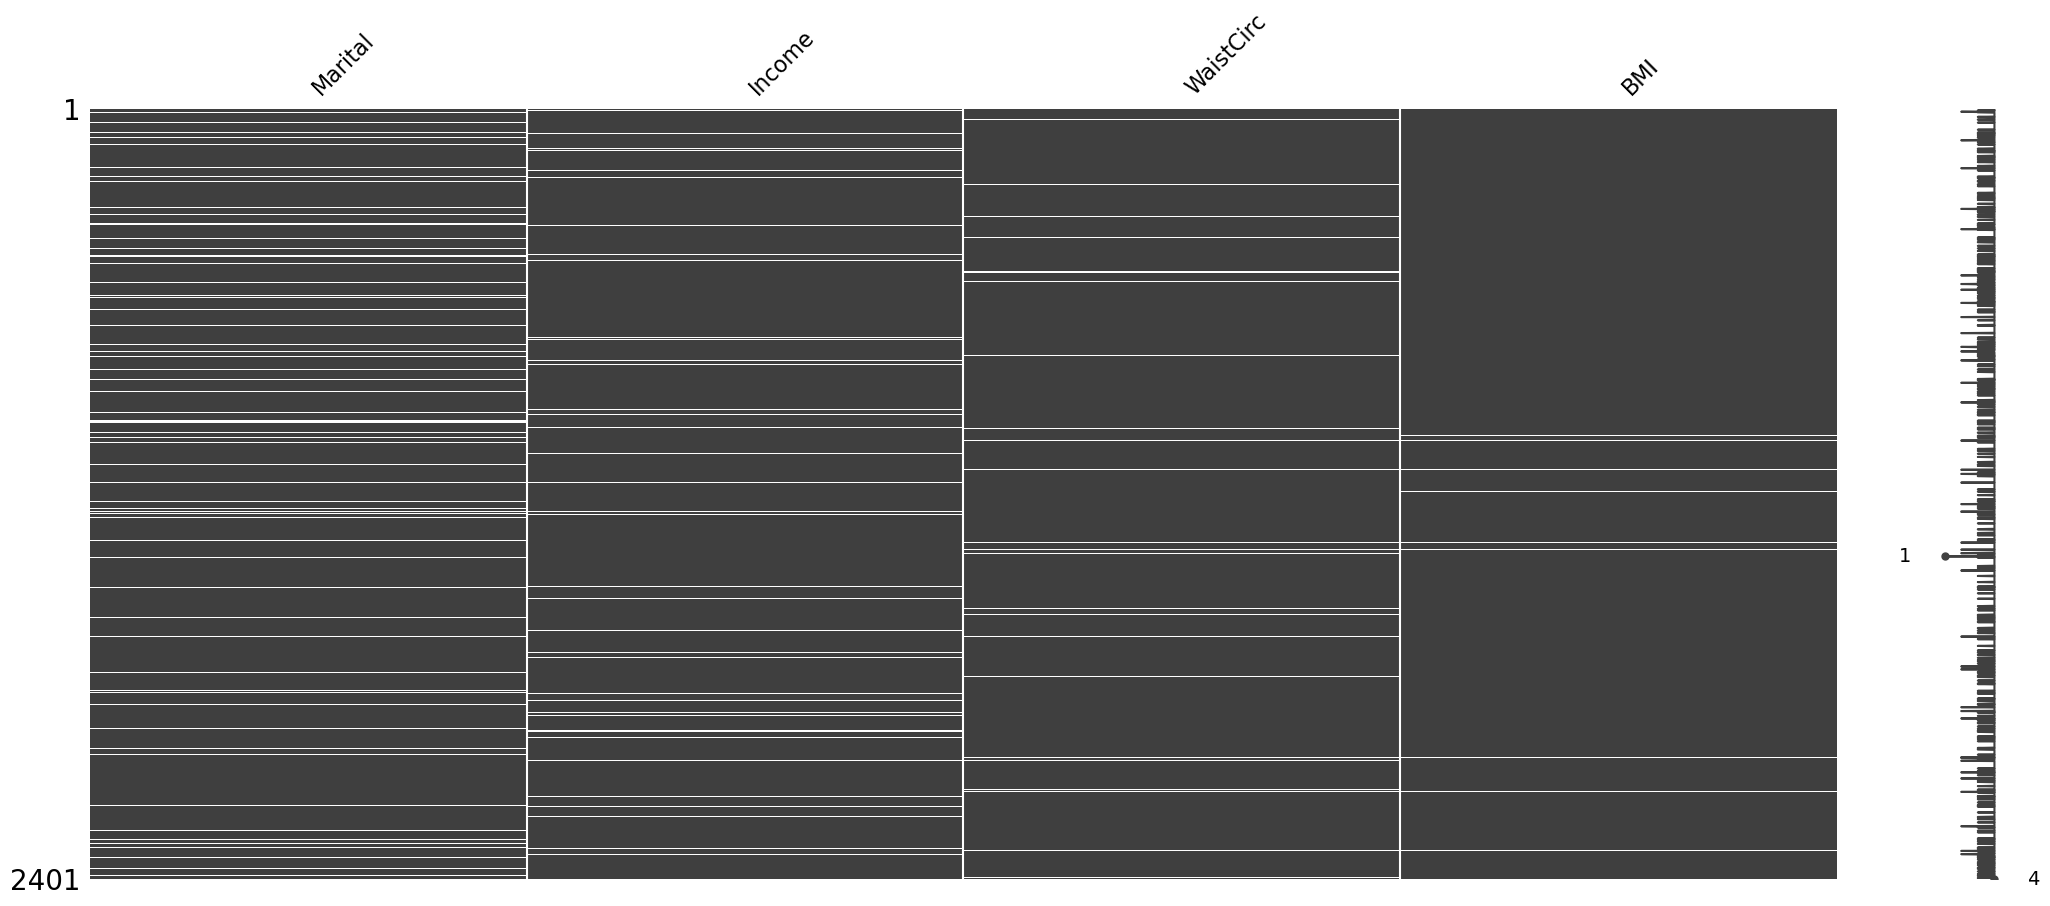

In [17]:
missingno.matrix(eda_ml[['Marital','Income','WaistCirc','BMI']]);

- Will address missing values after the validation split to prevent data leakage

In [18]:
# Display desriptive statitistics for all categortical columns
eda_ml.describe(include='object')

,Sex,Marital,Race,MetabolicSyndrome
count,2401,2193,2401,2401
unique,2,5,6,2
top,Female,Married,White,No MetSyn
freq,1211,1192,933,1579


In [19]:
# Display desriptive statitistics for all numerical columns
eda_ml.describe(include='number')

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
count,2401.000000,2284.0,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,48.691795,4005.25394,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364
std,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477
min,20.000000,300.0,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000
25%,34.000000,1600.0,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000
50%,48.000000,2500.0,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000
75%,63.000000,6200.0,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000
max,80.000000,9000.0,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000


In [20]:
# Check target for null values
eda_ml['MetabolicSyndrome'].isna().sum()

0

### **Exploratory Visualizations**

### Custom Functions

In [21]:
# Updating function
def plot_categorical_vs_target(eda_ml, x, y, figsize=(6,4),
                            order = None, target_type='reg'):

  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

  # REGRESSION-TARGET PLOT
  if target_type=='reg': #Added if statement here
    # Barplot
    sns.barplot(data=eda_ml, x=x, y=y, ax=ax, order=order, alpha=0.6,
                linewidth=1, edgecolor='black', errorbar=None)

    # Boxplot
    sns.stripplot(data=eda_ml, x=x, y=y, hue=x, ax=ax,
                  order=order, hue_order=order, legend=False,
                  edgecolor='white', linewidth=0.5,
                  size=3,zorder=0)

  # CLASSIFICATION-TARGET PLOT # This is the new code for the classification task
  elif target_type=='class':
    ax = sns.histplot(data=eda_ml, hue=y, x=x, stat='percent',  multiple='fill')

  # Rotate xlabels
  ax.set_xticks(ax.get_xticks()) # Added this to prevent a bug
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax

In [22]:
# Get correlations
corr = eda_ml.corr(numeric_only = True)
corr.round(2)

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
Age,1.00,-0.01,0.23,0.08,0.23,0.12,0.15,0.24,0.08,0.07
Income,-0.01,1.00,-0.06,-0.08,-0.10,-0.05,0.01,-0.09,0.08,-0.04
WaistCirc,0.23,-0.06,1.00,0.91,0.12,0.05,0.36,0.26,-0.35,0.24
BMI,0.08,-0.08,0.91,1.00,0.08,0.04,0.27,0.21,-0.29,0.16
Albuminuria,0.23,-0.10,0.12,0.08,1.00,0.54,0.18,0.20,-0.02,0.11
UrAlbCr,0.12,-0.05,0.05,0.04,0.54,1.00,0.13,0.11,0.00,0.08
UricAcid,0.15,0.01,0.36,0.27,0.18,0.13,1.00,0.06,-0.25,0.21
BloodGlucose,0.24,-0.09,0.26,0.21,0.20,0.11,0.06,1.00,-0.21,0.27
HDL,0.08,0.08,-0.35,-0.29,-0.02,0.00,-0.25,-0.21,1.00,-0.39
Triglycerides,0.07,-0.04,0.24,0.16,0.11,0.08,0.21,0.27,-0.39,1.00


<Axes: >

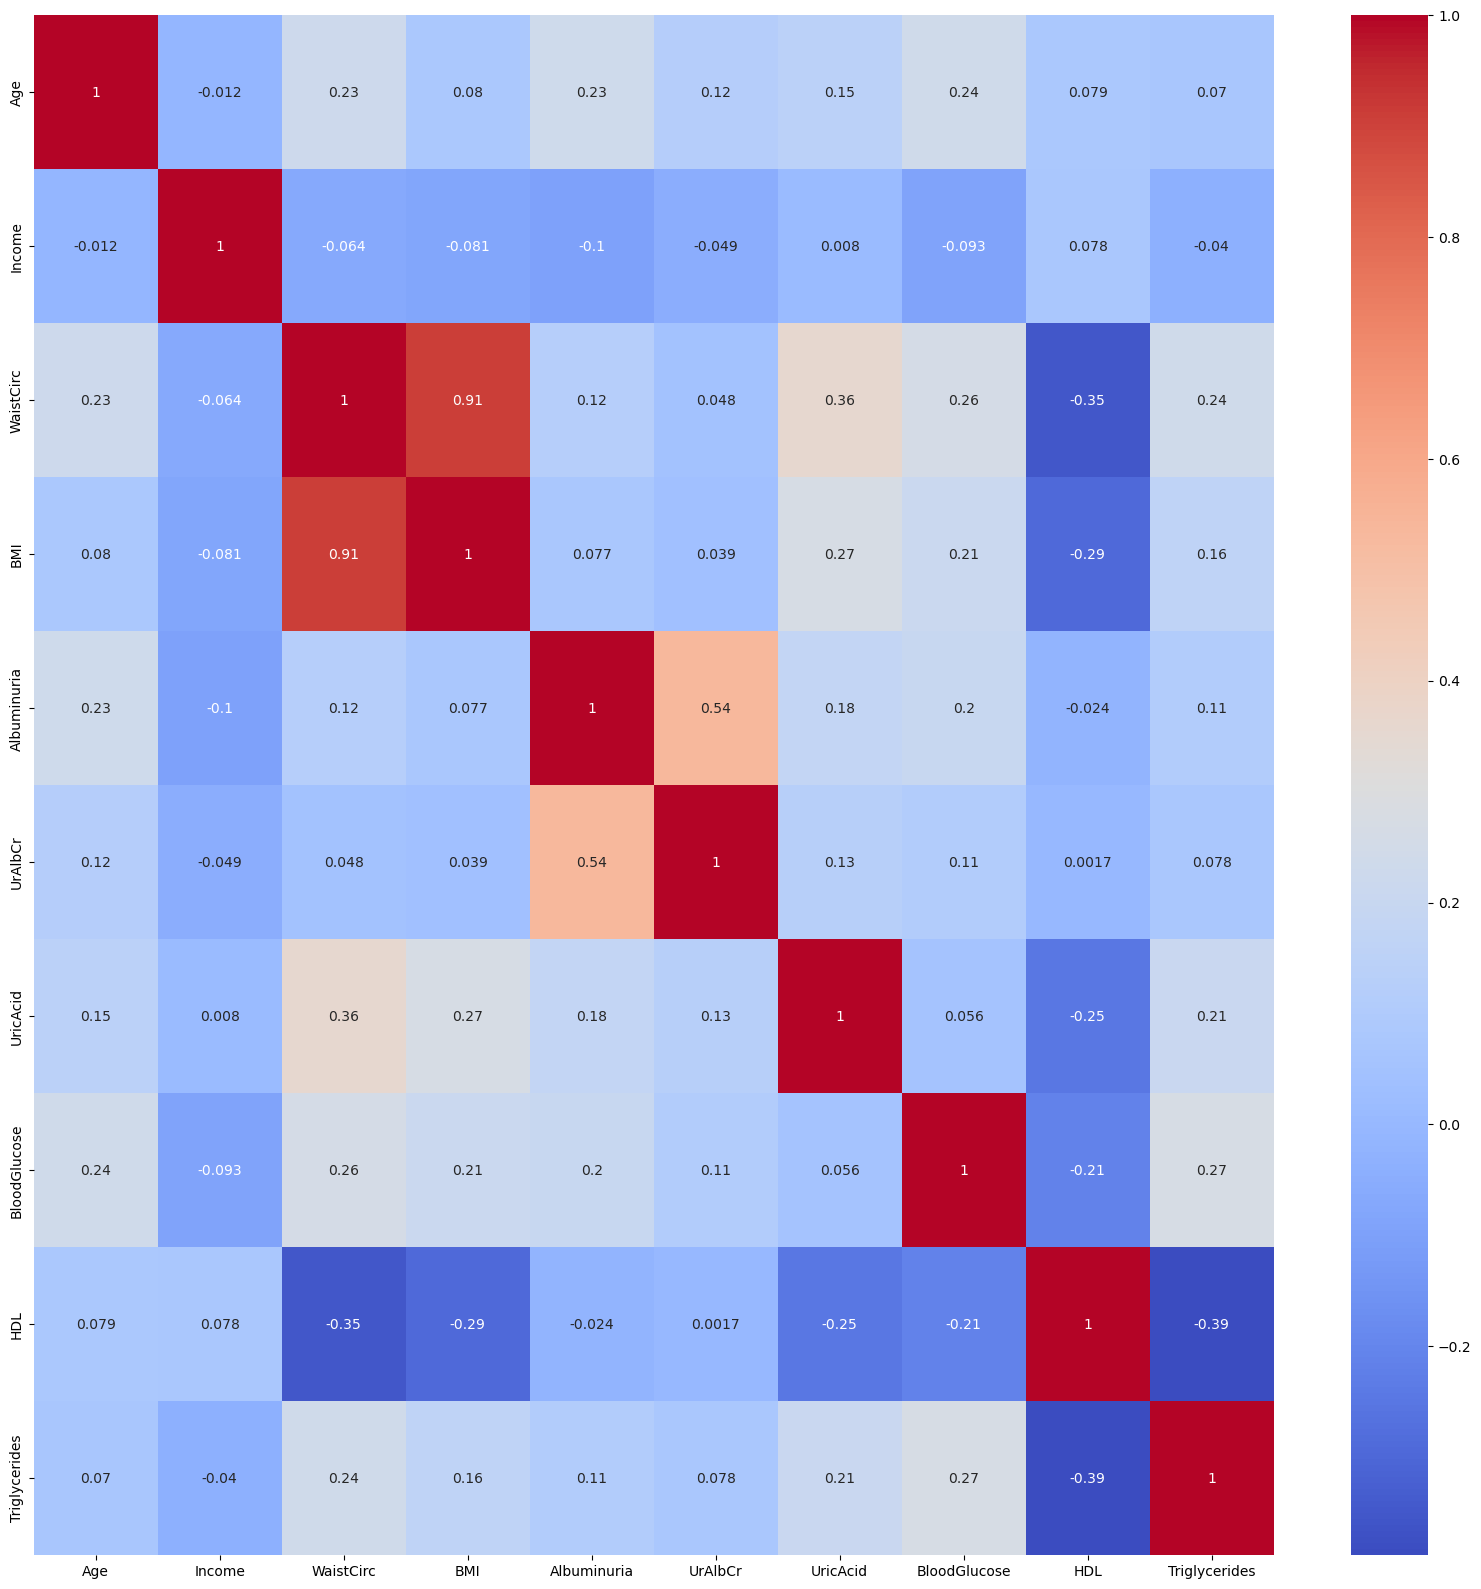

In [23]:
# Create a fig, ax with a figsize argument
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, ax=ax)

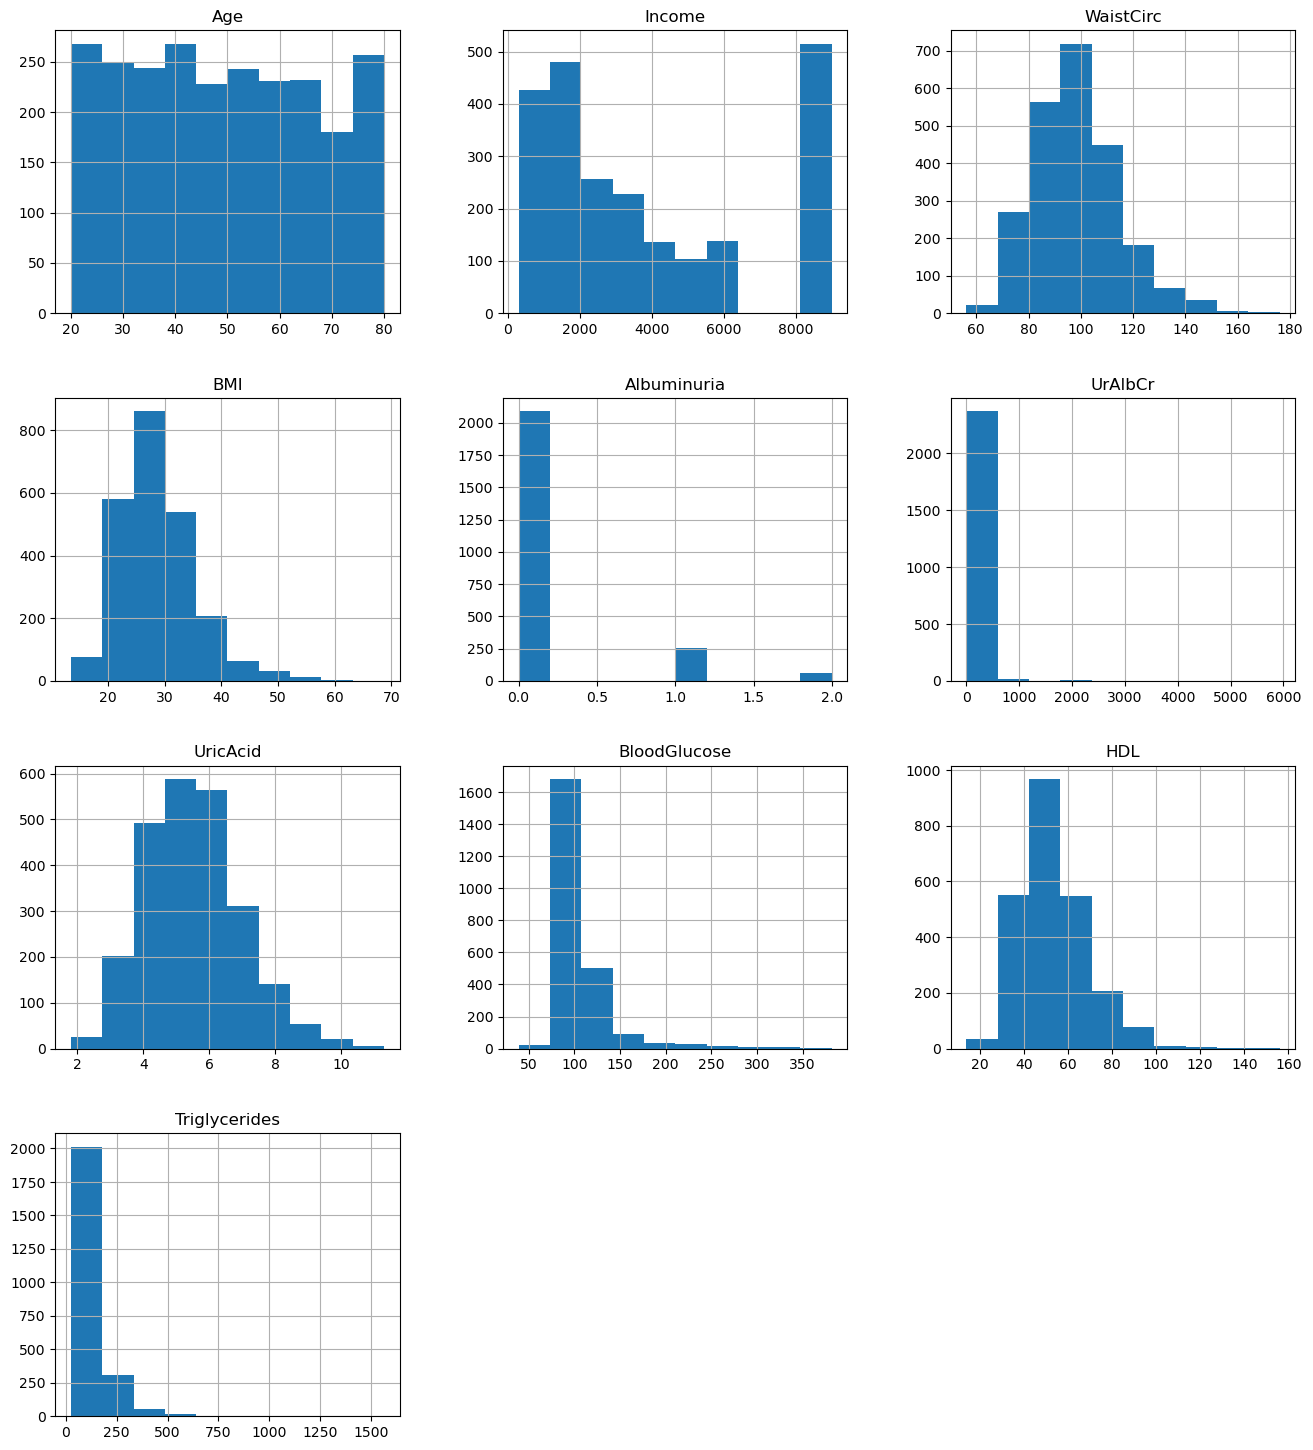

In [24]:
eda_ml.hist(figsize=(16,18));

Sex count plot 



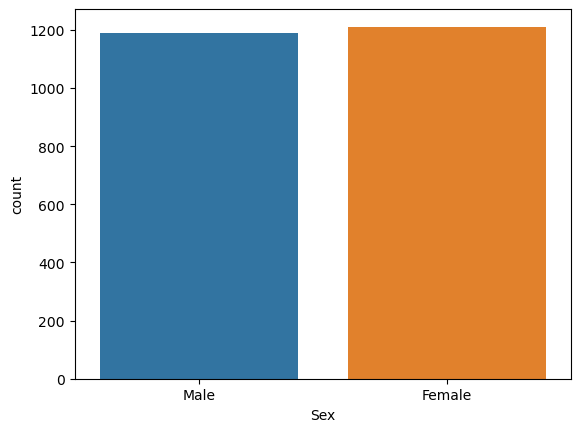

Marital count plot 



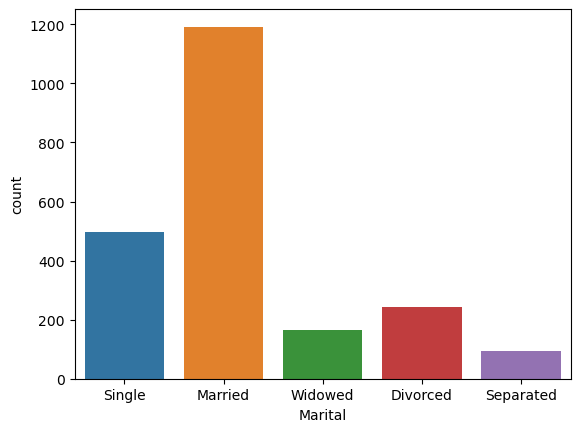

Race count plot 



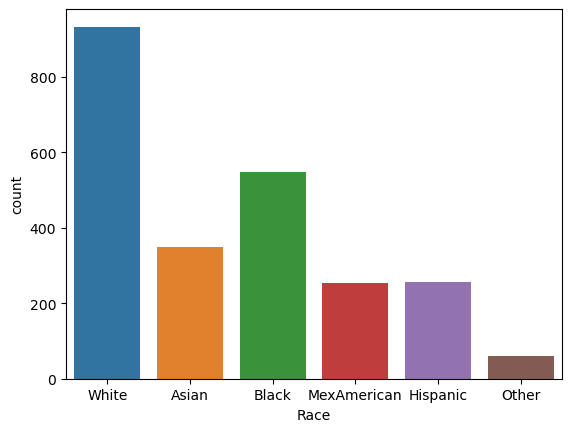

MetabolicSyndrome count plot 



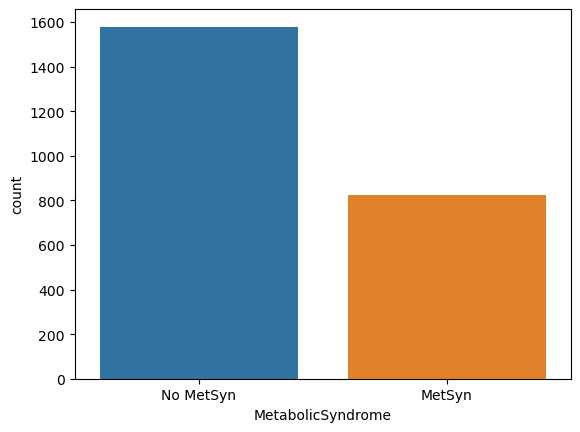

In [25]:
for col in eda_ml.select_dtypes('object').columns:
    print(col +' count plot \n')
    sns.countplot(x =col, data =eda_ml)
    plt.show()

### Split the Data (Validation Split)

#### Check Class Balance

In [26]:
# Check how many samples of each class are present
eda_ml['MetabolicSyndrome'].value_counts(normalize=False)

No MetSyn    1579
MetSyn        822
Name: MetabolicSyndrome, dtype: int64

In [27]:
# Check how many samples of each class are present
eda_ml['MetabolicSyndrome'].value_counts(normalize=True)

No MetSyn    0.657643
MetSyn       0.342357
Name: MetabolicSyndrome, dtype: float64

- Will address class imbalance after train test split

In [28]:
# Split X and y, we are predicting Metaboic Syndrome
target = 'MetabolicSyndrome'
X = eda_ml.drop(columns=[target]).copy()
y = eda_ml[target].copy()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=321)

In [29]:
# Check for class balance of target
y_train.value_counts(1)

No MetSyn    0.657778
MetSyn       0.342222
Name: MetabolicSyndrome, dtype: float64

In [30]:
X_train.shape

(1800, 13)

In [31]:
X_test.shape

(601, 13)

In [32]:
X_train.dtypes

Age                int64
Sex               object
Marital           object
Income             Int64
Race              object
WaistCirc        float64
BMI              float64
Albuminuria        int64
UrAlbCr          float64
UricAcid         float64
BloodGlucose       int64
HDL                int64
Triglycerides      int64
dtype: object

### Preprocessing for Machine Learning

#### Scale data and impute missing values

##### Numeric

In [33]:
cat_cols = ['Sex', 'Marital','Race']
num_cols = ['Age', 'Income','WaistCirc','BMI','Albuminuria','UrAlbCr','UricAcid','BloodGlucose','HDL','Triglycerides']

In [34]:
# Categorical Pipeline / Tuple
# Using value 'Undisclosed' to fill in null values (all in 'Marital')
impute_missing = SimpleImputer(strategy='constant',fill_value='Missing')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
scaler = StandardScaler()

nom_pipe = make_pipeline(impute_missing, ohe_encoder, scaler)
nom_pipe

# Nominal Tuple
nom_tuple = ('categorical', nom_pipe, cat_cols)

nom_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='Missing', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
                 ('standardscaler', StandardScaler())]),
 ['Sex', 'Marital', 'Race'])

In [35]:
## PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
print("Numeric Columns:", num_cols)

# Transformers
median_imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(median_imputer, scaler)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

Numeric Columns: ['Age', 'Income', 'WaistCirc', 'BMI', 'Albuminuria', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL', 'Triglycerides']


('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 ['Age',
  'Income',
  'WaistCirc',
  'BMI',
  'Albuminuria',
  'UrAlbCr',
  'UricAcid',
  'BloodGlucose',
  'HDL',
  'Triglycerides'])

I chose the median for the  features  as I felt that this would represent the missing values the best in the data set.

In [36]:
# Create the preprocessor using make_column_transformer
preprocessor = ColumnTransformer([num_tuple, nom_tuple],
                                 verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Income', 'WaistCirc', 'BMI',
                                  'Albuminuria', 'UrAlbCr', 'UricAcid',
                                  'BloodGlucose', 'HDL', 'Triglycerides']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Sex', 'Marital', 'Race'])],
                  verbose_feature_names_out=False)

In [37]:
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['Age', 'Income', 'WaistCirc', 'BMI', 'Albuminuria', 'UrAlbCr',
       'UricAcid', 'BloodGlucose', 'HDL', 'Triglycerides', 'Sex_Female',
       'Sex_Male', 'Marital_Divorced', 'Marital_Married',
       'Marital_Missing', 'Marital_Separated', 'Marital_Single',
       'Marital_Widowed', 'Race_Asian', 'Race_Black', 'Race_Hispanic',
       'Race_MexAmerican', 'Race_Other', 'Race_White'], dtype=object)

In [38]:
X_train_tf = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_train_tf.head()

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,Sex_Female,Sex_Male,Marital_Divorced,Marital_Married,Marital_Missing,Marital_Separated,Marital_Single,Marital_Widowed,Race_Asian,Race_Black,Race_Hispanic,Race_MexAmerican,Race_Other,Race_White
seqn,,,,,,,,,,,,,,,,,,,,,,,,
68301,0.571562,-1.085238,1.438040,0.595673,-0.361836,-0.114277,0.438450,0.172555,-0.760346,0.413342,-1.006689,1.006689,2.928219,-0.985658,-0.297104,-0.195096,-0.525063,-0.272003,-0.426471,-0.533663,-0.327125,-0.346554,-0.165521,1.240479
67938,-1.228534,1.436811,-1.855149,-1.016856,-0.361836,-0.156290,-0.821263,-0.417937,1.020513,-0.452326,0.993355,-0.993355,-0.341504,-0.985658,-0.297104,-0.195096,1.904534,-0.272003,2.344823,-0.533663,-0.327125,-0.346554,-0.165521,-0.806141
67380,0.515309,-0.676258,1.731184,2.780876,-0.361836,-0.155893,-0.681295,0.024932,1.284344,-0.535764,0.993355,-0.993355,-0.341504,-0.985658,-0.297104,-0.195096,1.904534,-0.272003,-0.426471,1.873840,-0.327125,-0.346554,-0.165521,-0.806141
71244,0.852826,1.709464,-0.458039,-0.474323,-0.361836,-0.141491,-0.821263,-0.034117,0.690724,-0.275021,0.993355,-0.993355,2.928219,-0.985658,-0.297104,-0.195096,-0.525063,-0.272003,-0.426471,-0.533663,-0.327125,-0.346554,-0.165521,1.240479
66714,-1.566052,1.709464,-1.499635,-1.453897,-0.361836,-0.117008,-1.381135,-0.447462,1.812006,-0.963384,0.993355,-0.993355,-0.341504,-0.985658,-0.297104,-0.195096,1.904534,-0.272003,-0.426471,-0.533663,-0.327125,2.885555,-0.165521,-0.806141


In [39]:
X_test_tf = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_tf.head()

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,Sex_Female,Sex_Male,Marital_Divorced,Marital_Married,Marital_Missing,Marital_Separated,Marital_Single,Marital_Widowed,Race_Asian,Race_Black,Race_Hispanic,Race_MexAmerican,Race_Other,Race_White
seqn,,,,,,,,,,,,,,,,,,,,,,,,
67763,-0.666004,1.436811,0.939072,0.113421,-0.361836,-0.166619,0.718386,-0.831282,1.943922,0.913970,0.993355,-0.993355,-0.341504,1.014550,-0.297104,-0.195096,-0.525063,-0.272003,-0.426471,-0.533663,-0.327125,-0.346554,-0.165521,1.240479
63991,-0.272233,-1.085238,-0.021442,-0.263338,-0.361836,-0.158475,-1.241167,-0.831282,0.492851,-0.295880,0.993355,-0.993355,-0.341504,-0.985658,-0.297104,-0.195096,1.904534,-0.272003,-0.426471,1.873840,-0.327125,-0.346554,-0.165521,-0.806141
67483,0.852826,-1.085238,-0.414379,-0.414041,-0.361836,-0.094313,-1.801039,0.113506,0.163062,-0.076856,0.993355,-0.993355,2.928219,-0.985658,-0.297104,-0.195096,-0.525063,-0.272003,-0.426471,-0.533663,3.056931,-0.346554,-0.165521,-0.806141
67039,-1.003522,0.482522,-1.618140,-1.363474,-0.361836,-0.142832,-1.591087,-0.772233,0.360936,-0.806938,0.993355,-0.993355,-0.341504,1.014550,-0.297104,-0.195096,-0.525063,-0.272003,-0.426471,-0.533663,-0.327125,-0.346554,-0.165521,1.240479
70405,0.684067,1.709464,0.833041,0.610743,-0.361836,-0.152615,-0.681295,-0.595085,-0.034811,0.142169,0.993355,-0.993355,-0.341504,1.014550,-0.297104,-0.195096,-0.525063,-0.272003,-0.426471,-0.533663,-0.327125,-0.346554,-0.165521,1.240479


In [40]:
## confirm the first 3 rows index in y_test matches X_test_tf
y_test.head()

seqn
67763    No MetSyn
63991    No MetSyn
67483       MetSyn
67039    No MetSyn
70405    No MetSyn
Name: MetabolicSyndrome, dtype: object

### **Model the Data**

#### Create a baseline model for comparison

#### Import Libraries and Custom Functions

In [41]:
## Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Classification Metrics
from sklearn.metrics import (ConfusionMatrixDisplay,
                             PrecisionRecallDisplay,
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)

In [42]:
def classification_metrics(y_true, y_pred, label='Metabolic Syndrome',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict

def evaluate_classification(model, X_train, y_train, X_test, y_test,
                            figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                         output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                         label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                        output_dict=True,figsize=figsize,
                                        colorbar=colorbar, cmap=cmap_test,
                                        label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

In [43]:
# Define RanFor model pipeline
X_train_rf = preprocessor.fit_transform(X_train)
X_test_rf = preprocessor.transform(X_test)

# Create an instance of the model
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train_tf, y_train)

RandomForestClassifier(random_state=42)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

      MetSyn       1.00      1.00      1.00       616
   No MetSyn       1.00      1.00      1.00      1184

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



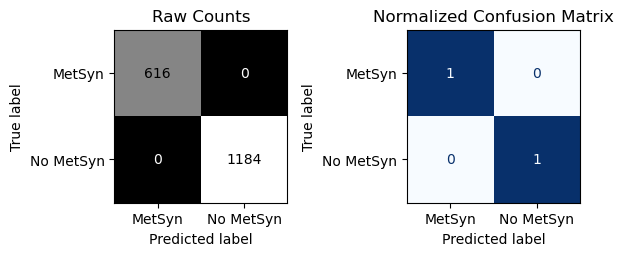


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

      MetSyn       0.86      0.83      0.85       206
   No MetSyn       0.91      0.93      0.92       395

    accuracy                           0.90       601
   macro avg       0.89      0.88      0.88       601
weighted avg       0.90      0.90      0.90       601



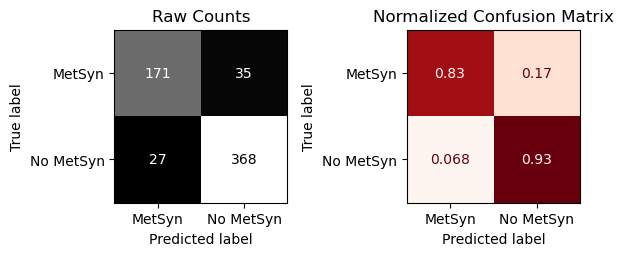

In [44]:
evaluate_classification(rfc, X_train_rf, y_train, X_test_rf, y_test)

#### Addressing class imbalance with Random Oversampling
- I'm using this approach because the classes are not extremely imbalanced and adding a few duplicates to further emphasize any heavily wieghted features can be important when predicting disease.

In [45]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler()
X_train_ov, y_train_ov = over_sampler.fit_resample(X_train_tf, y_train)
y_train_ov.value_counts()

MetSyn       1184
No MetSyn    1184
Name: MetabolicSyndrome, dtype: int64

In [46]:
# Create an instance of the model
rfc_over = RandomForestClassifier(random_state = 42)
rfc_over.fit(X_train_ov, y_train_ov)

RandomForestClassifier(random_state=42)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

      MetSyn       1.00      1.00      1.00      1184
   No MetSyn       1.00      1.00      1.00      1184

    accuracy                           1.00      2368
   macro avg       1.00      1.00      1.00      2368
weighted avg       1.00      1.00      1.00      2368



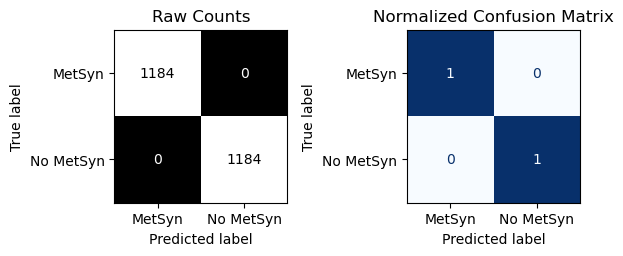


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

      MetSyn       0.83      0.85      0.84       206
   No MetSyn       0.92      0.91      0.91       395

    accuracy                           0.89       601
   macro avg       0.87      0.88      0.88       601
weighted avg       0.89      0.89      0.89       601



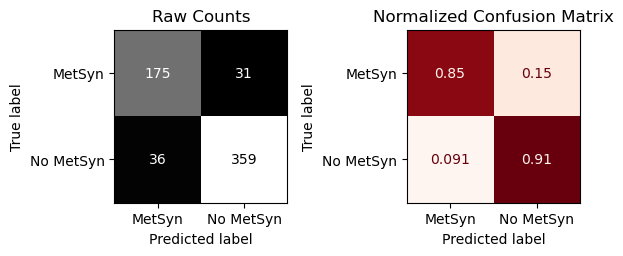

In [47]:
evaluate_classification(rfc_over, X_train_ov, y_train_ov, X_test_tf, y_test)

- Using Random Oversampling did not improve our model significantly in any area. Reducing the amount of false negatives would be the goal and the numbers is slightly increased in the oversampled model.

#### Classification Metrics of Chosen Model

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

      MetSyn       1.00      1.00      1.00       616
   No MetSyn       1.00      1.00      1.00      1184

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



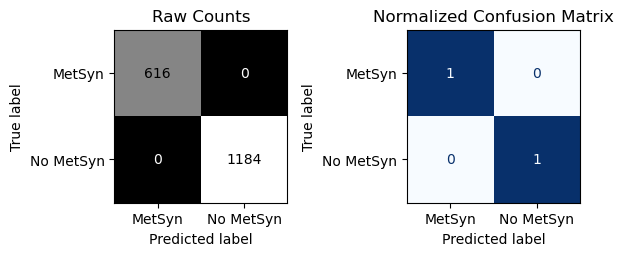


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

      MetSyn       0.86      0.83      0.85       206
   No MetSyn       0.91      0.93      0.92       395

    accuracy                           0.90       601
   macro avg       0.89      0.88      0.88       601
weighted avg       0.90      0.90      0.90       601



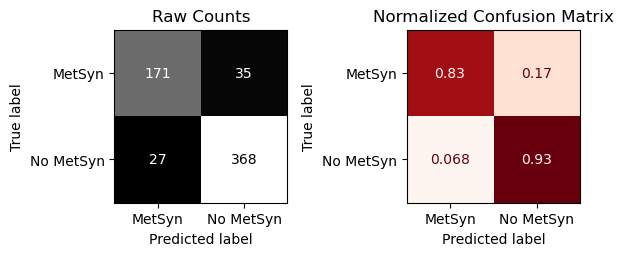

In [48]:
evaluate_classification(rfc, X_train_rf, y_train, X_test_rf, y_test)

### **Top 10 Permutation Importances**

In [49]:
from sklearn.inspection import permutation_importance

In [50]:
# Obtain feature importances from the fit model
rfc.feature_importances_

array([0.05544581, 0.02932417, 0.14713515, 0.09954525, 0.00742604,
       0.05791199, 0.04821793, 0.19027253, 0.09826084, 0.18365767,
       0.01268896, 0.01180995, 0.00544906, 0.00617896, 0.00391907,
       0.00273538, 0.00603926, 0.00454769, 0.00585009, 0.00643563,
       0.00406923, 0.00374254, 0.00217443, 0.00716237])

In [51]:
# Checking the number of feature importances matches the # of columns
print(len(rfc.feature_importances_))
print(len(X_train_tf.columns))
len(rfc.feature_importances_) == len(X_train_tf.columns)

24
24


True

In [52]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):

    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_

    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)

    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)

    return importances

In [53]:
importances = get_importances(rfc,sort=True,ascending=False)
importances

BloodGlucose         0.190273
Triglycerides        0.183658
WaistCirc            0.147135
BMI                  0.099545
HDL                  0.098261
UrAlbCr              0.057912
Age                  0.055446
UricAcid             0.048218
Income               0.029324
Sex_Female           0.012689
Sex_Male             0.011810
Albuminuria          0.007426
Race_White           0.007162
Race_Black           0.006436
Marital_Married      0.006179
Marital_Single       0.006039
Race_Asian           0.005850
Marital_Divorced     0.005449
Marital_Widowed      0.004548
Race_Hispanic        0.004069
Marital_Missing      0.003919
Race_MexAmerican     0.003743
Marital_Separated    0.002735
Race_Other           0.002174
Name: Feature Importance, dtype: float64

In [54]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

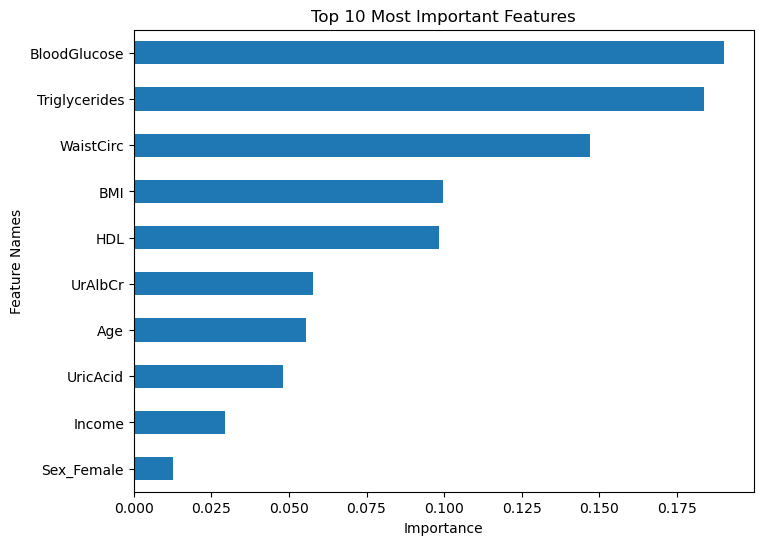

In [55]:
# testing our function
importances = get_importances(rfc,sort=True,ascending=False,
                              name="RandomForest Importances")
plot_importance(importances,top_n=10);

In [56]:
from sklearn.inspection import permutation_importance
# Permutation importance takes a fit model and the test data.
r = permutation_importance(rfc, X_test_tf, y_test,n_repeats =5)
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [57]:
## can make the mean importances into a series
permutation_importances = pd.Series(r['importances_mean'],index=X_test_tf.columns,
                           name = 'permutation importance')
permutation_importances = permutation_importances.sort_values(ascending=False)
permutation_importances

BloodGlucose         0.100832
Triglycerides        0.093844
WaistCirc            0.057903
HDL                  0.044260
BMI                  0.030616
UrAlbCr              0.013644
Age                  0.012313
Sex_Female           0.011314
Sex_Male             0.010316
Albuminuria          0.004326
Marital_Single       0.003661
UricAcid             0.003328
Marital_Widowed      0.002662
Marital_Divorced     0.001997
Marital_Missing      0.000998
Income               0.000000
Race_Asian           0.000000
Race_Black           0.000000
Race_Other           0.000000
Race_MexAmerican    -0.000333
Marital_Married     -0.000666
Race_Hispanic       -0.000666
Marital_Separated   -0.001664
Race_White          -0.005324
Name: permutation importance, dtype: float64

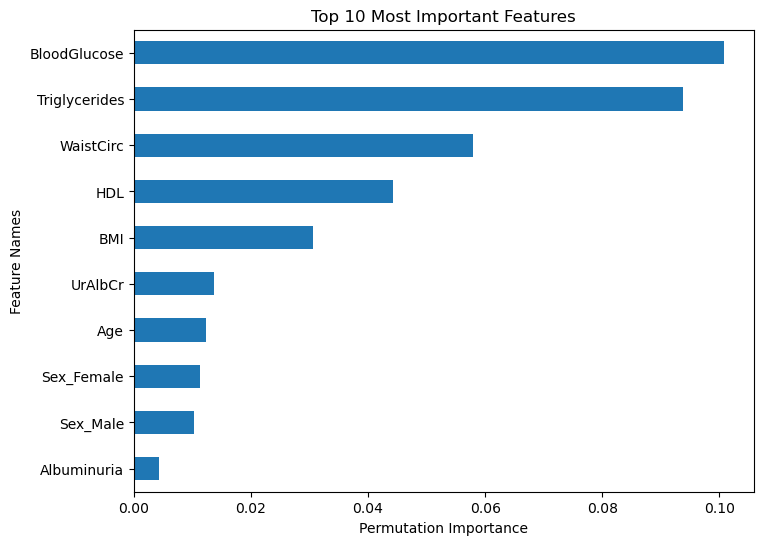

In [58]:
ax = plot_importance(permutation_importances,top_n=10)
ax.set(xlabel='Permutation Importance');

In [59]:
def get_color_dict(importances, color_rest='#006ba4' , color_top='green',
                    top_n=7):
    ## color -coding top 5 bars
    highlight_feats = importances.sort_values(ascending=True).tail(top_n).index
    colors_dict = {col: color_top if col in highlight_feats else color_rest for col in importances.index}
    return colors_dict

In [60]:
colors_top7 = get_color_dict(importances, top_n=7)
colors_top7

{'BloodGlucose': 'green',
 'Triglycerides': 'green',
 'WaistCirc': 'green',
 'BMI': 'green',
 'HDL': 'green',
 'UrAlbCr': 'green',
 'Age': 'green',
 'UricAcid': '#006ba4',
 'Income': '#006ba4',
 'Sex_Female': '#006ba4',
 'Sex_Male': '#006ba4',
 'Albuminuria': '#006ba4',
 'Race_White': '#006ba4',
 'Race_Black': '#006ba4',
 'Marital_Married': '#006ba4',
 'Marital_Single': '#006ba4',
 'Race_Asian': '#006ba4',
 'Marital_Divorced': '#006ba4',
 'Marital_Widowed': '#006ba4',
 'Race_Hispanic': '#006ba4',
 'Marital_Missing': '#006ba4',
 'Race_MexAmerican': '#006ba4',
 'Marital_Separated': '#006ba4',
 'Race_Other': '#006ba4'}

In [61]:
def plot_importance_color_ax(importances, top_n=None,  figsize=(8,6),
                          color_dict=None, ax=None):

    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors, ax=ax)

    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize, ax=ax)

    # set titles and axis labels
    ax.set(xlabel='Importance',
           ylabel='Feature Names',
           title=title)

    ## return ax in case want to continue to update/modify figure
    return ax

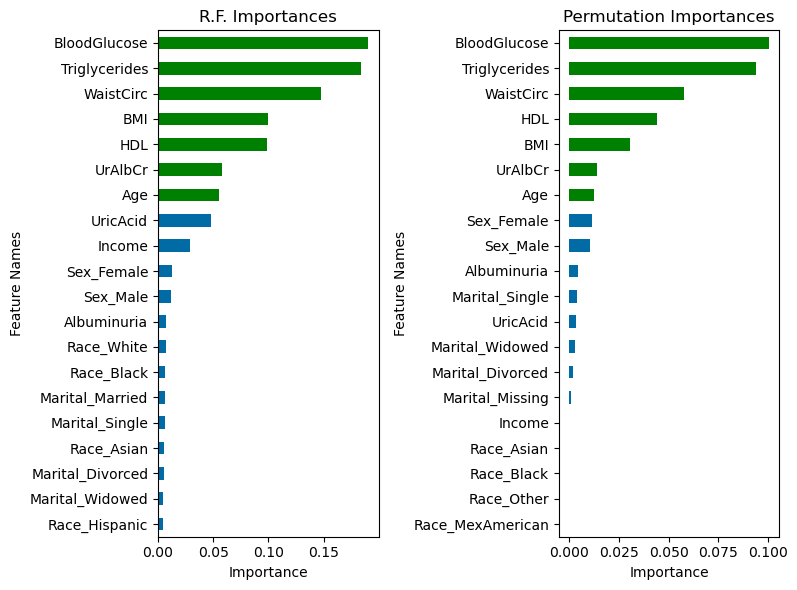

In [62]:
fig, axes = plt.subplots(ncols=2, figsize=(20,8))
n = 20 # setting the # of features to use for both subplots
plot_importance_color_ax(importances, top_n=n, ax=axes[0],
                         color_dict= colors_top7)
plot_importance_color_ax(permutation_importances, top_n=n, ax=axes[1],
                         color_dict=colors_top7)
axes[0].set(title='R.F. Importances')
axes[1].set(title='Permutation Importances')
fig.tight_layout()

Blood Glucose, Triglycerides are the top two features that influence the occurence of Metabolic Syndrome in this data set. With this being a medical data set and Metabolic Syndrome being heavily influenced by diet and lifestyle it stands to reason that the next important feature would be waist circumference. HDL being 'good' cholesterol makes sense to be high on the important features list even though we don't know in what direction it influences the model. These make up more than 50% of the feature importance.

### Create Explanatory Visualizations for the most important features
- Blood Glucose
- Triglycerides

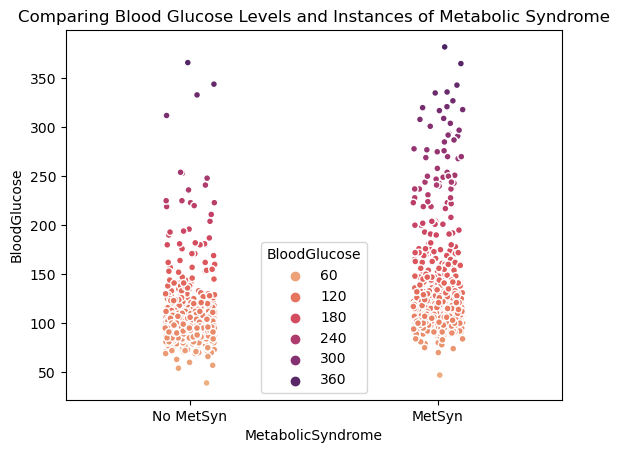

In [63]:
sns.stripplot(data=eda_ml, x='MetabolicSyndrome',y='BloodGlucose', hue='BloodGlucose', palette='flare', edgecolor='white', linewidth=1).set(title="Comparing Blood Glucose Levels and Instances of Metabolic Syndrome");

This visualization shows the higher the Blood Glucose level especially around the the 120 marker the higher the chance of being diagnosed with Metabolic Syndrome.

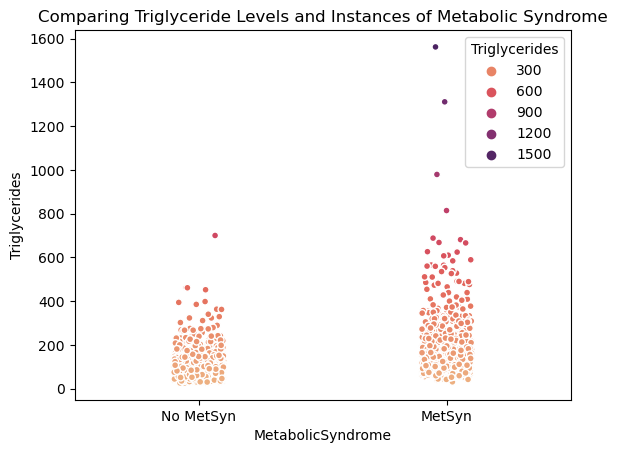

In [64]:
sns.stripplot(data=eda_ml, x='MetabolicSyndrome',y='Triglycerides', hue='Triglycerides', palette='flare', edgecolor='white', linewidth=1).set(title="Comparing Triglyceride Levels and Instances of Metabolic Syndrome");

This image shows that the when the Triglyceride levels reach 300 there is an increased risk of contracting Metabolic Syndrome

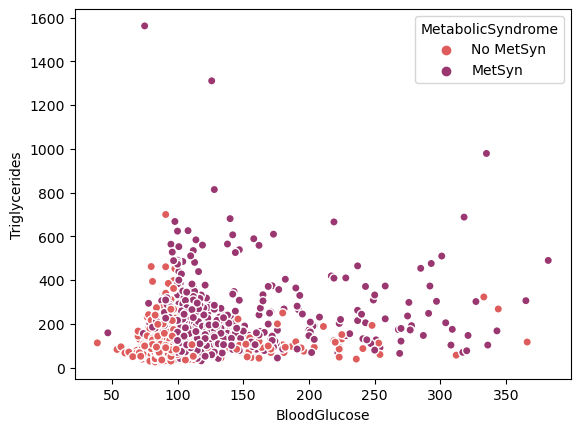

In [65]:
sns.scatterplot(data=eda_ml, x='BloodGlucose',y='Triglycerides', hue='MetabolicSyndrome', palette='flare', edgecolor='white', linewidth=1);

In [66]:
scatter_kws = dict(edgecolor='white')

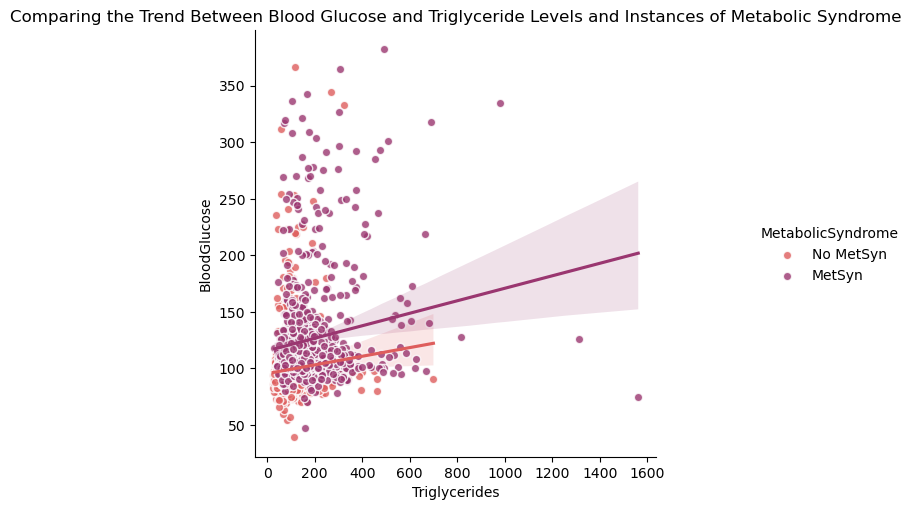

In [67]:
g = sns.lmplot(data=eda_ml, x="Triglycerides", y="BloodGlucose",
               palette='flare', scatter_kws=scatter_kws,
                hue="MetabolicSyndrome");
g.ax.set_title("Comparing the Trend Between Blood Glucose and Triglyceride Levels and Instances of Metabolic Syndrome");

Here you can clearly see that instances of Metabolic Syndrome increase significantly when a person's Blood Glucose Levels reach 100 and their Triglycerides reach 100 as well. Blood Glucose is the most significant feature.

## **Part Two**

### Import Libraries

In [68]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from imblearn.over_sampling import SMOTE

### Model and Tranform a KNeighbors Model with PCA

#### Transform with PCA

In [69]:
pca = PCA(n_components=.85)

In [70]:
pca_rf = make_pipeline(preprocessor, pca)

### **Fit and evaluate a model using your new features and compare it to your model from Part 1**

In [71]:
X_train_pca = pca_rf.fit_transform(X_train)
X_test_pca = pca_rf.transform(X_test)

In [72]:
rfc_pca = RandomForestClassifier(random_state = 42)
rfc_pca.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

      MetSyn       1.00      1.00      1.00       616
   No MetSyn       1.00      1.00      1.00      1184

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



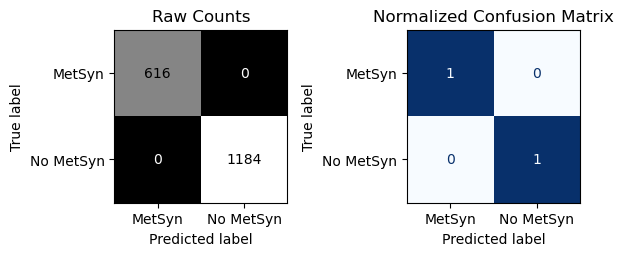


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

      MetSyn       0.73      0.70      0.72       206
   No MetSyn       0.85      0.86      0.86       395

    accuracy                           0.81       601
   macro avg       0.79      0.78      0.79       601
weighted avg       0.81      0.81      0.81       601



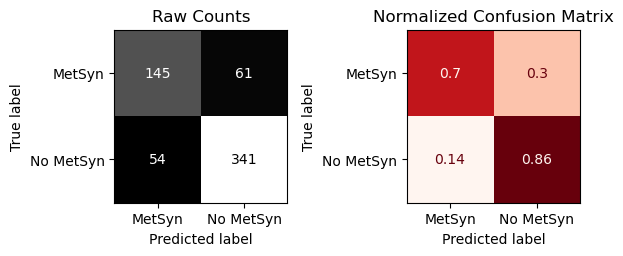

In [73]:
evaluate_classification(rfc_pca, X_train_pca, y_train,
                 X_test_pca, y_test)

Using PCA has created a model with about double the amount of false negatives. The accuracy decresed from 90% to 81%







### **Using a Wrapper Method for Feature Selection**

In [74]:
from sklearn.feature_selection import SequentialFeatureSelector
rfw = RandomForestClassifier(random_state = 42)

In [75]:
X_train_f = preprocessor.fit_transform(X_train)
X_test_f = preprocessor.transform(X_test)

In [76]:
y.value_counts()

No MetSyn    1579
MetSyn        822
Name: MetabolicSyndrome, dtype: int64

In [77]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train_sm,y_train_sm = smote.fit_resample(X_train_f, y_train)
y_train_sm.value_counts()

MetSyn       1184
No MetSyn    1184
Name: MetabolicSyndrome, dtype: int64

In [78]:
# Instantiate the SequentialFeatureSelector
sk_sfs = SequentialFeatureSelector(rfw, n_features_to_select=10,
                                direction = 'forward', cv=2,
                                 n_jobs=-1)
sk_sfs.fit(X_train_sm,y_train_sm)

SequentialFeatureSelector(cv=2,
                          estimator=RandomForestClassifier(random_state=42),
                          n_features_to_select=10, n_jobs=-1)

In [79]:
# Preview array of T/F for selected (or not) features
sk_sfs.support_[0:5]

array([ True, False,  True, False, False])

In [80]:
# .support_ returns an array of T/F whether it is above threshold
features_to_keep = sk_sfs.support_
# Only include the features selected
X_train_10 = X_train_sm.loc[:,features_to_keep]
X_test_10 = X_test_f.loc[:,features_to_keep]
X_train_10.shape

(2368, 10)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

      MetSyn       1.00      1.00      1.00      1184
   No MetSyn       1.00      1.00      1.00      1184

    accuracy                           1.00      2368
   macro avg       1.00      1.00      1.00      2368
weighted avg       1.00      1.00      1.00      2368



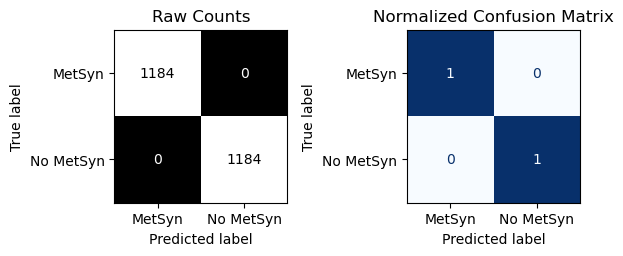


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

      MetSyn       0.82      0.89      0.86       206
   No MetSyn       0.94      0.90      0.92       395

    accuracy                           0.90       601
   macro avg       0.88      0.90      0.89       601
weighted avg       0.90      0.90      0.90       601



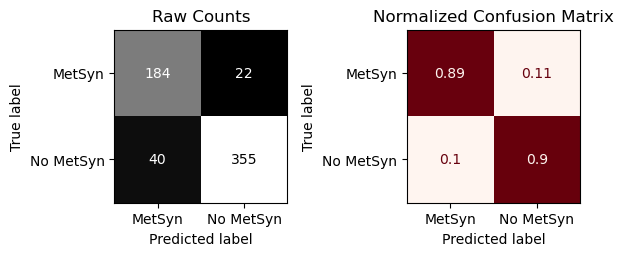

In [81]:
# Instantiate default random forest
rf_clf = RandomForestClassifier(random_state=42)
# Fit on 10 selected featuers
rf_clf.fit(X_train_10, y_train_sm)
# Evaluate with custom function
evaluate_classification(rf_clf, X_train_10, y_train_sm, X_test_10, y_test)

In [82]:
## Calculate feature importances
importances2 = permutation_importance(rf_clf, X_test_10, y_test)

## Create a Series of Feature Importances
importances2 = pd.Series(importances2['importances_mean'], index=rf_clf.feature_names_in_)
importances2 = importances2.sort_values(ascending=False)
importances2.head(10)

BloodGlucose        0.116140
WaistCirc           0.089517
Triglycerides       0.079867
HDL                 0.053245
Sex_Male            0.018636
Age                 0.018303
Sex_Female          0.013977
Marital_Divorced    0.003328
Race_MexAmerican    0.002662
Race_Hispanic       0.000333
dtype: float64

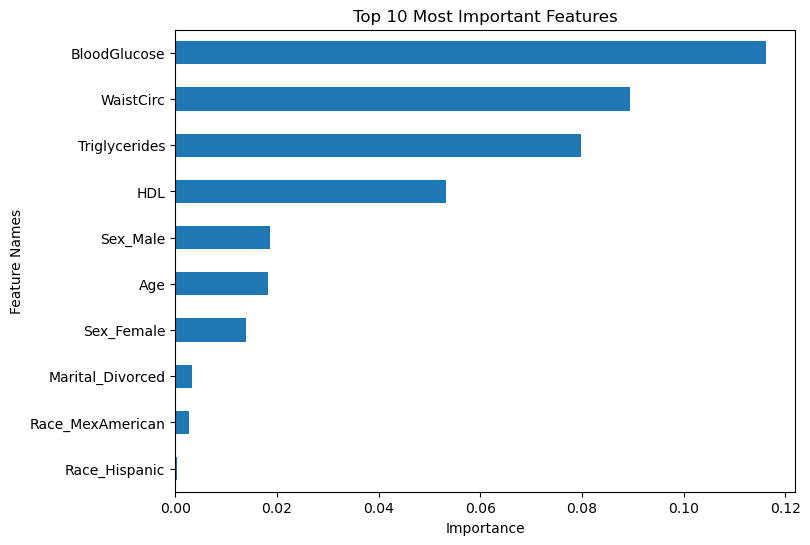

In [83]:
plot_importance(importances2,top_n=10);

- One thing I noticed is that more demographical information is important in this model vs. the first model's permutation importance was more focused on medical numbers and information.
- Blood Glucose, triglycerides and waist circumference remain the top 3 features in every model even if the orders are not the same. BMI is not indicated here at all.